### <ins>Data Exploration & Analysis of Heart Failture Clinical Dataset<ins>
#### https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

### Please Watch Video Presentation of This Project Here: https://vimeo.com/632205031

### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.mlab as mlab

### Load Data

In [2]:
HeartFail = pd.read_csv('C:/Users/Mia/OneDrive/Documents/GitHub/Final_Project/Datasets/heart_failure_clinical_records_dataset.csv')

In [3]:
HeartFail.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### <ins>Column Key<ins>
#### Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

####### sited from website: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

#### Interested in Looking at the trends in the data in relation to gender:

In [23]:
HeartFail[['sex']].value_counts()

sex
1      194
0      105
dtype: int64

#### There are much less women in the study than men: 105 women and 194 men.

#### <ins>Correlation Matrix<ins>

In [24]:
HeartFail.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.0,0.088,-0.082,-0.1,0.06,0.093,-0.052,0.16,-0.046,0.065,0.019,-0.22,0.25
anaemia,0.088,1.0,-0.19,-0.013,0.032,0.038,-0.044,0.052,0.042,-0.095,-0.11,-0.14,0.066
creatinine_phosphokinase,-0.082,-0.19,1.0,-0.0096,-0.044,-0.071,0.024,-0.016,0.06,0.08,0.0024,-0.0093,0.063
diabetes,-0.1,-0.013,-0.0096,1.0,-0.0049,-0.013,0.092,-0.047,-0.09,-0.16,-0.15,0.034,-0.0019
ejection_fraction,0.06,0.032,-0.044,-0.0049,1.0,0.024,0.072,-0.011,0.18,-0.15,-0.067,0.042,-0.27
high_blood_pressure,0.093,0.038,-0.071,-0.013,0.024,1.0,0.05,-0.0049,0.037,-0.1,-0.056,-0.2,0.079
platelets,-0.052,-0.044,0.024,0.092,0.072,0.05,1.0,-0.041,0.062,-0.13,0.028,0.011,-0.049
serum_creatinine,0.16,0.052,-0.016,-0.047,-0.011,-0.0049,-0.041,1.0,-0.19,0.007,-0.027,-0.15,0.29
serum_sodium,-0.046,0.042,0.06,-0.09,0.18,0.037,0.062,-0.19,1.0,-0.028,0.0048,0.088,-0.2
sex,0.065,-0.095,0.08,-0.16,-0.15,-0.1,-0.13,0.007,-0.028,1.0,0.45,-0.016,-0.0043


#### <ins>Heat Map<ins>

<AxesSubplot:>

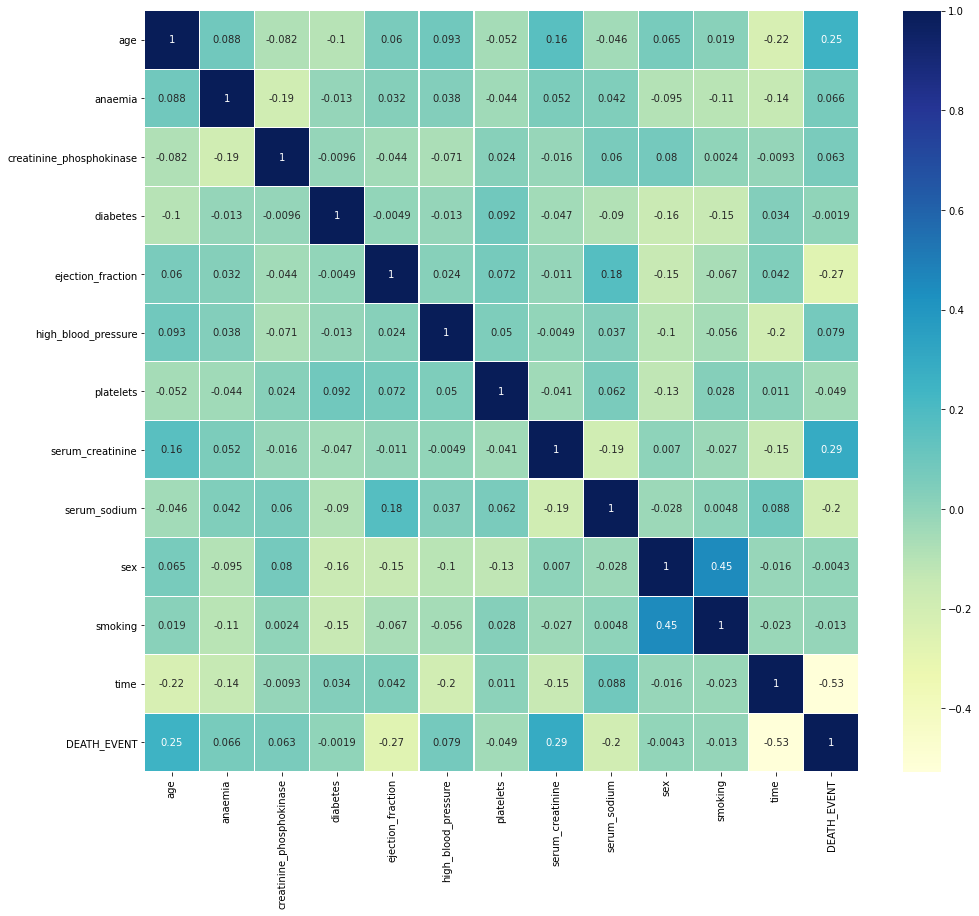

In [25]:
plt.figure(figsize=(16,14))
sns.heatmap(HeartFail.corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

#### <ins>Cluster Map<ins>

<Figure size 1440x1008 with 0 Axes>

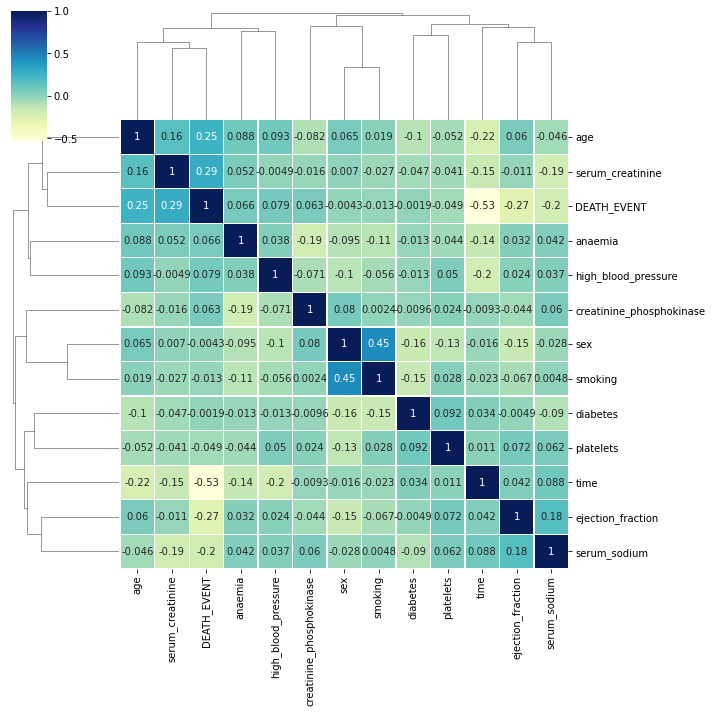

In [26]:
plt.figure(figsize=(20,14))
sns.clustermap(HeartFail.corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

#### <ins>Pairplots<ins>

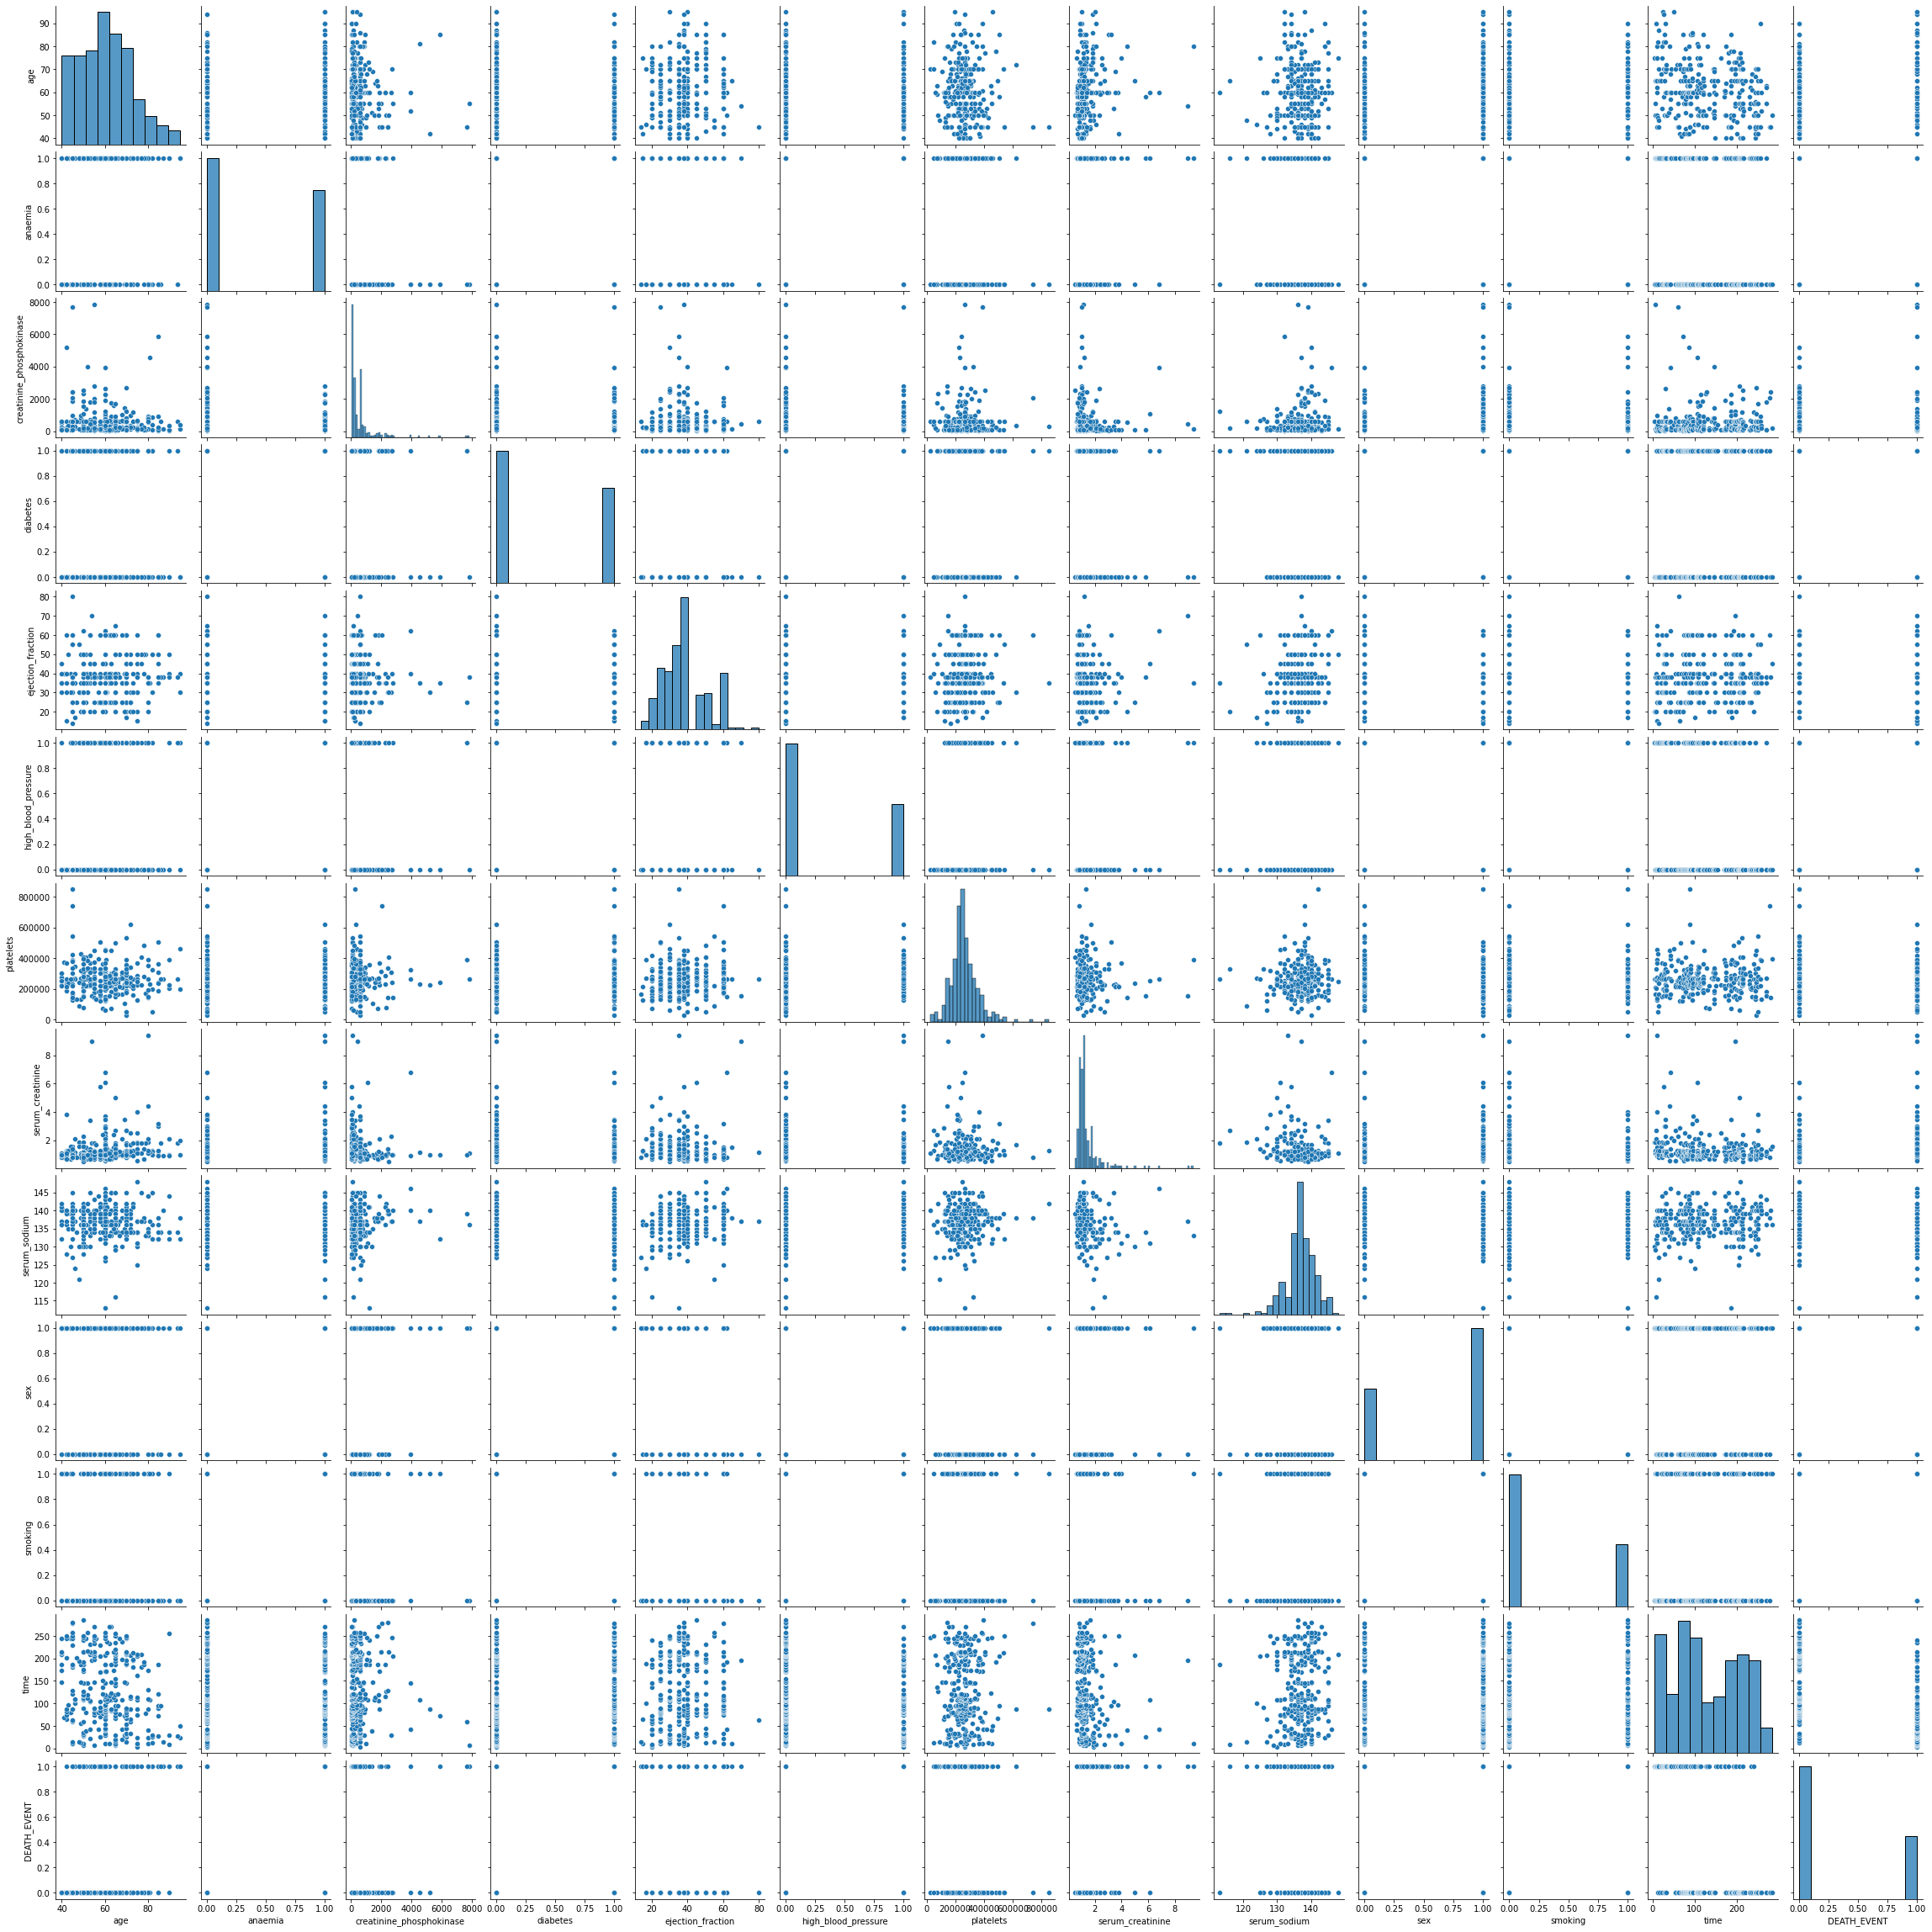

In [6]:
sns.pairplot(HeartFail)

#### <ins>Bar Graphs<ins>

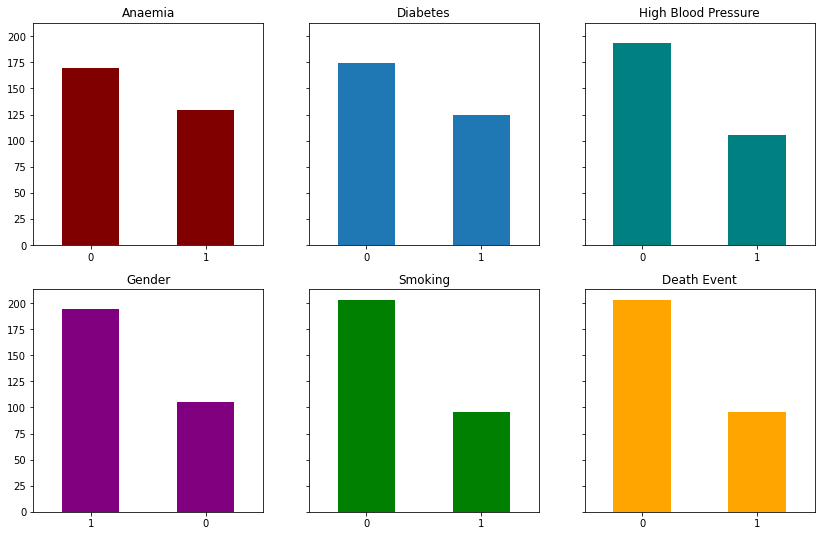

In [31]:
fig, axes = plt.subplots(2, 3, figsize = (14, 9), sharey = True)
HeartFail.anaemia.value_counts().plot.bar(title = 'Anaemia', color= "maroon", ax=axes[0,0])
HeartFail.diabetes.value_counts().plot.bar(title ='Diabetes', ax=axes[0,1])
HeartFail.high_blood_pressure.value_counts().plot.bar(title = 'High Blood Pressure', color= "teal", ax=axes[0,2])
HeartFail.sex.value_counts().plot.bar(title = 'Gender', color="purple", ax=axes[1,0])
HeartFail.smoking.value_counts().plot.bar(title = 'Smoking', color= "green", ax=axes[1,1])
HeartFail.DEATH_EVENT.value_counts().plot.bar(title = 'Death Event', color= "orange", ax=axes[1,2])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)
#I learned this code from my colleague Silvia

#### This data shows that quite a significant amount of people had anaemia. Several people had diabetes and high blood pressure. There are much more nonsmokers than smokers. There are significantly more males than females in the study. And thankfully, more people lived than died.

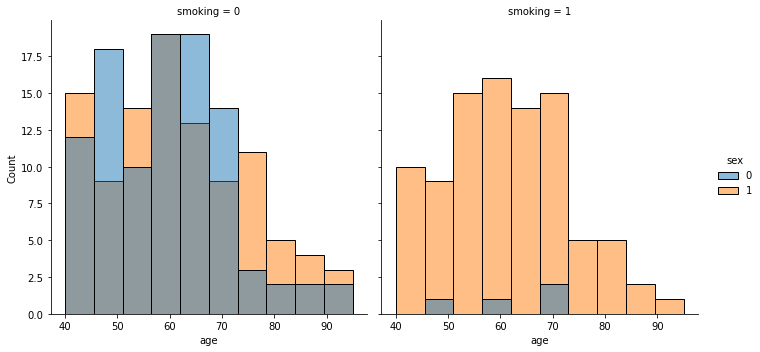

In [42]:

sns.displot(HeartFail, x= 'age', hue = 'sex', col = 'smoking', kind='hist')

#### Graphs show the age range of men and women as well as if they are smokers. The data shows much more male smokers than female smokers, yet we saw that there were significantly more men in the study than women so that may be one reason for this result.

<AxesSubplot:xlabel='age', ylabel='Count'>

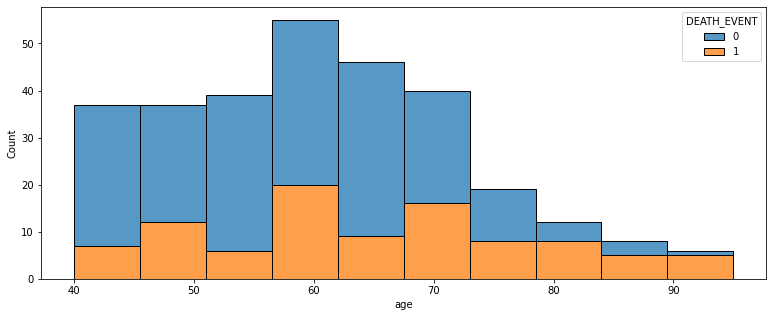

In [14]:
plt.figure(figsize = (13, 5))
sns.histplot(data = HeartFail, x = 'age', hue='DEATH_EVENT', multiple= 'stack')

#### Graph shows age and death events.

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

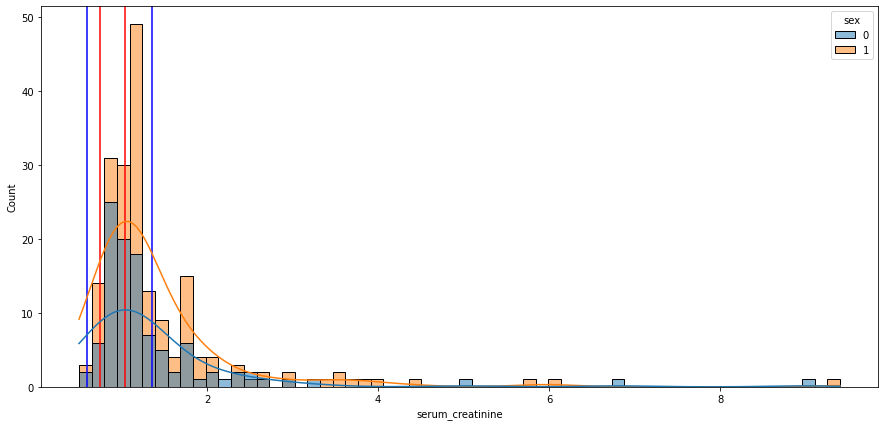

In [74]:
plt.figure(figsize = (15, 7))
plt.axvline(1.04, color = 'red')
plt.axvline(1.35, color = 'blue')
plt.axvline(.74, color = 'red')
plt.axvline(.59, color = 'blue')
sns.histplot(HeartFail, x= 'serum_creatinine', kde = True, hue='sex', color ='orange')
#This shows serum creatinine normal ranges for both men (blue lines) and women (red lines)

#### This graph shows serum creatinine levels for both men and women. The normal range for women is shown in the graph between the red lines at .74-1.04 mg/dL, and the normal range for men is shown inbetween the blue lines at .59-1.35mg/dL. 
####Resources for serum creatinine: https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

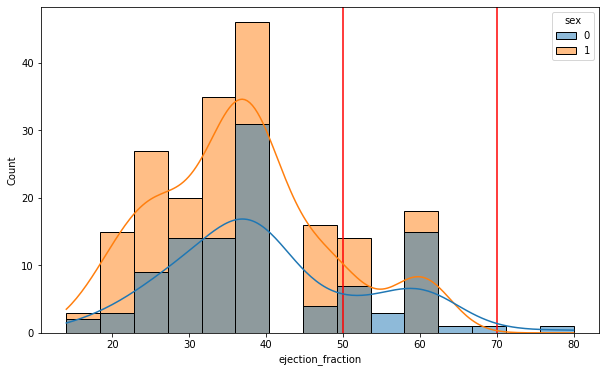

In [10]:
plt.figure(figsize = (10, 6))
plt.axvline(50, color ='red')
plt.axvline(70, color ='red')
sns.histplot(HeartFail, x= 'ejection_fraction', kde = True, hue='sex', color ='orange')

#### The above graph shows the normal range of ejection fraction is between the two red lines between 50 and 70%. This graph shows that most people in this dataset were well below the normal ejection fraction range. Anything below 40% can be an indicator of heart failure.
#### Source on ejection fraction:https://www.heart.org/en/health-topics/heart-failure/diagnosing-heart-failure/ejection-fraction-heart-failure-measurement

<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

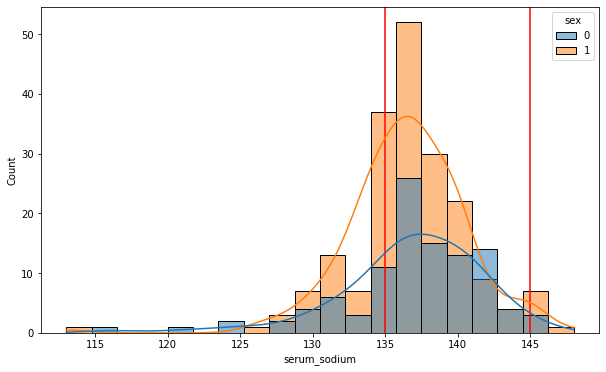

In [11]:
plt.figure(figsize = (10, 6))
plt.axvline(135, color ='red')
plt.axvline(145, color ='red')
sns.histplot(HeartFail, x= 'serum_sodium', kde = True, hue='sex', color ='orange')

#### The above graph shows the normal range for serum sodium indicated inbetween the red lines at 135-145 mEq/L. Most of the patients in this dataset were in the normal range. Anything under 135 can indicate hyponatremia as sodium is diluted from the body.
####Source for serum sodium:https://www.mayoclinic.org/diseases-conditions/hyponatremia/symptoms-causes/syc-20373711

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

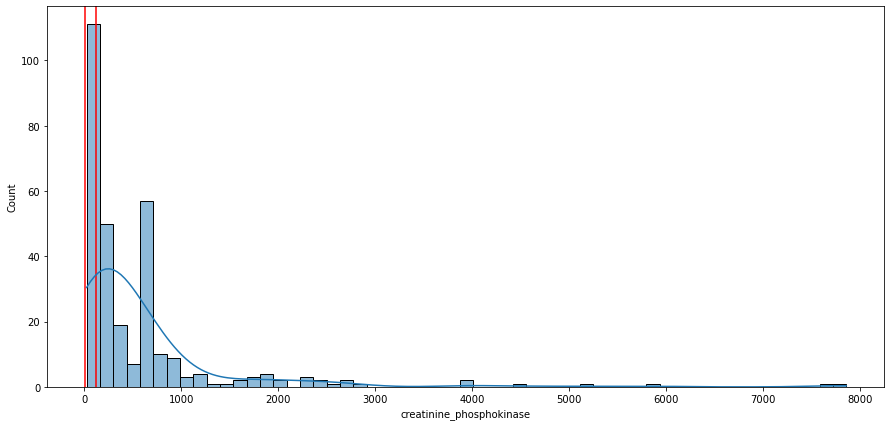

In [35]:
plt.figure(figsize = (15, 7))
plt.axvline(10, color ='red')
plt.axvline(120, color ='red')
sns.histplot(HeartFail.creatinine_phosphokinase, kde = True)

#This shows creatinine phosphokinase normal range of 10- 120 mcg/L in men and women

#### Above graph looks at creatinine phosphokinase levels overall, while the below graph adds the gender variable.

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

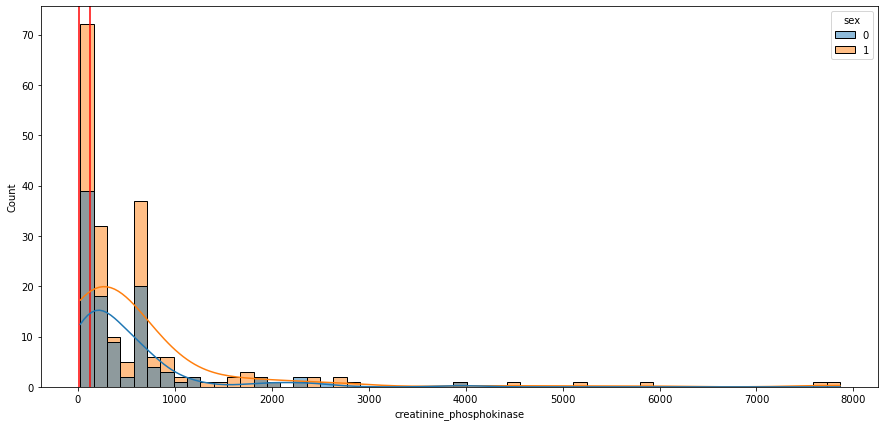

In [41]:
plt.figure(figsize = (15, 7))
plt.axvline(10, color ='red')
plt.axvline(120, color ='red')
sns.histplot(HeartFail, x= 'creatinine_phosphokinase', kde = True, hue='sex')
#sns.histplot(HeartFail, x= 'serum_sodium', kde = True, hue='sex', color ='orange')

#### The above graph shows the normal range of creatinine phosphokinase inbetween 10 and 120  mcg/L. This data shows quite a bit of patients were outside the normal range here.

### https://www.ucsfhealth.org/medical-tests/creatine-phosphokinase-test

<AxesSubplot:xlabel='platelets', ylabel='Count'>

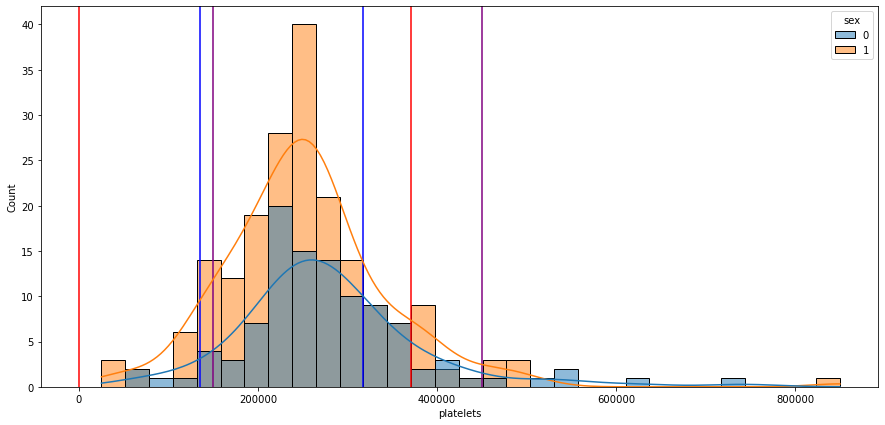

In [47]:
plt.figure(figsize = (15, 7))
plt.axvline(450000, color = 'purple')
plt.axvline(150000, color = 'purple')
plt.axvline(135000, color = 'blue')
plt.axvline(317000, color = 'blue')
plt.axvline(.157000, color = 'red')
plt.axvline(371000, color = 'red')
sns.histplot(HeartFail, x= 'platelets', kde = True, hue='sex', color ='orange')
#This shows platelets normal ranges for both men (blue lines) and women (red lines) as well as danger zones below the purple line on the left and to the right of the red line on the right

#### Graph shows the normal range of platelet counts for women in between the red lines between 157,000 and 371,000 microliters of blood so most of the women in this study were in the normal range. In between the blue lines at 135,000 to 317,000 represents the normal range for men and most of the men in this study were in the normal range. The purple lines represent the point at which going below 150,000 platelet count or above 450,000 can be critical. To the left of the first purple line indicates a platelet count lower than 150,000 which can cause internal bleeding. A platelet count higher than 450,000 to the right of the second purple line indicates potiential blood clot issues. 
#### https://www.oneblood.org/media/blog/platelets/what-is-a-normal-platelet-count.stml

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

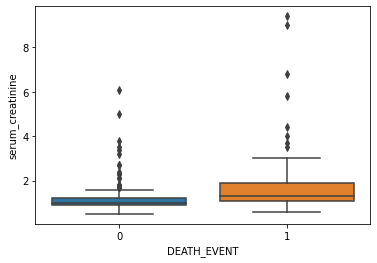

In [49]:
sns.boxplot(x=HeartFail.DEATH_EVENT, y=HeartFail.serum_creatinine)

#### This box plot shows that there were there is higher serum creatinine levels there can be more chance for a death event in this dataset.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

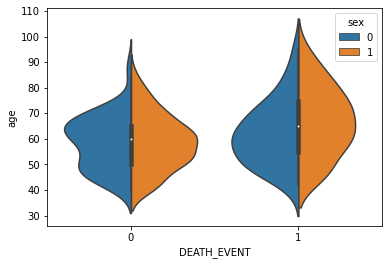

In [60]:
sns.violinplot(x=HeartFail.DEATH_EVENT, y=HeartFail.age, hue=HeartFail.sex, split=True)

#### This is a violin plot that shows age and gender in whether or not there was a death event. It makes sense that the death event plot on the right is a little higher that the survival plot on the left because as people age in general there is a greater chance of mortality. 

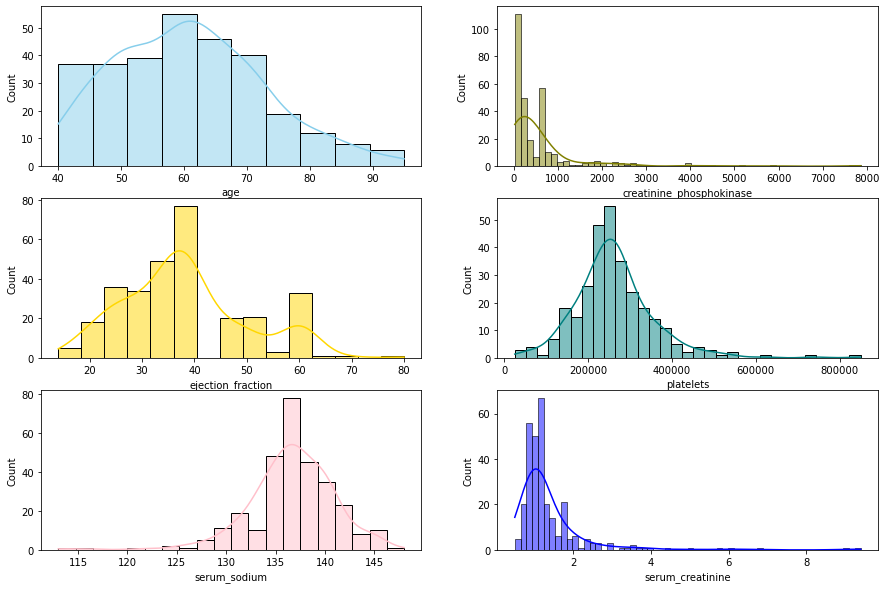

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

sns.histplot(data=HeartFail, x="age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=HeartFail, x="creatinine_phosphokinase", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=HeartFail, x="ejection_fraction", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=HeartFail, x="platelets", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=HeartFail, x="serum_sodium", kde=True, color="pink", ax=axs[2, 0])
sns.histplot(data=HeartFail, x="serum_creatinine", kde=True, color="blue", ax=axs[2, 1])
plt.show()
###### great site where I learned this code
###### https://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn

#### The above graphs show 6 of the Continuous IVs frequencies.The data shows a high amount of people in the study were inbetween 60 and 70 years old. The creatinine phosphokinase is positively skewed. The ejection fraction is relatively normally distributed. Platlets are slightly positively skewed, while serum sodium is sighly negatively skewed. And lastly, serum creatinine is postively skewed. 

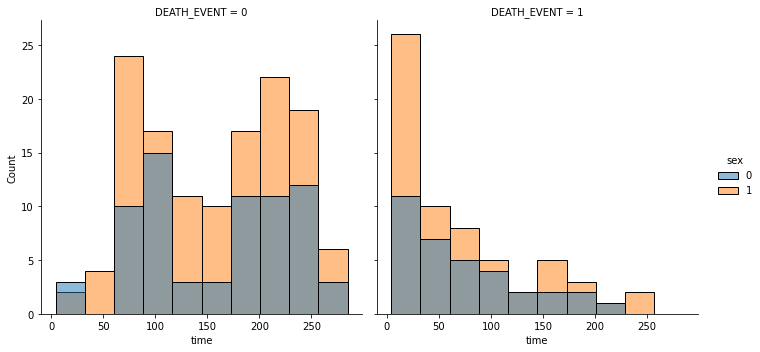

In [11]:
sns.displot(HeartFail, x='time', hue = 'sex', col = 'DEATH_EVENT', kind='hist')

#### Above graph shows time variable indicating follow up days, for both men and women as well as if there was a death or survival.

#### Preparing for Decision Trees and Random Forest
#### (This initial Decision Tree & Random Forest and using all 13 variables just for Exploration purposes. Our question prediction is based on biometric facters so the variable 'time' will be dropped in the analysis preceding this one.)
#### Import Packages

In [16]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [14]:
HeartFail.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Data Wrangling

In [15]:
x = HeartFail.drop('DEATH_EVENT', axis=1)
y = HeartFail['DEATH_EVENT']

#### Test Train Split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

#### Creating Preliminary Decision Tree

In [17]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

#### Assessing the Model & Reading the Confusion Matrix

In [18]:
treePredictions = decisionTree.predict(x_test)

In [19]:
print(confusion_matrix(y_test, treePredictions))

[[51 11]
 [13 15]]


##### Confusion matrix shows 51 were predicted to not die and did not die, 11 were predicted to not die but did die, 13 were predicted to die but did not die, and 15 people were predicted to die who did die.

#### How well does the model fit?

In [20]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        62
           1       0.58      0.54      0.56        28

    accuracy                           0.73        90
   macro avg       0.69      0.68      0.68        90
weighted avg       0.73      0.73      0.73        90



#### This shows that overall, the model is 73% accurate. The model was 80% accurate in not predicting a death, while 58% accurate in predicting a death.

#### Random Forest Data Wrangling

In [7]:
x = HeartFail.drop('DEATH_EVENT', axis=1)
y = HeartFail['DEATH_EVENT']

#### Test Train Split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

#### Preliminary Random Forest Model

In [9]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

#### Checking How Well Model Fits Data

In [10]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[57  5]
 [ 8 20]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        62
           1       0.80      0.71      0.75        28

    accuracy                           0.86        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.85      0.86      0.85        90



#### This model had higher accuracy. It is 85% accurate. Model is 88% accurate in not predicting death, while 80% accurate in predicting death due to heart failure. This confusion matrix also shows less prediction error than the previous confusion matrix, as only 8 and 5 values were not accurately predicted.

#### Hyperparameter and Number of Estimators

In [11]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.8111111111111111
4 : 0.7222222222222222
5 : 0.7555555555555555
8 : 0.7777777777777778
10 : 0.8111111111111111
20 : 0.8333333333333334
50 : 0.8777777777777778
75 : 0.8555555555555555
100 : 0.8555555555555555
250 : 0.8666666666666667
500 : 0.8555555555555555


#### Plotting the Results

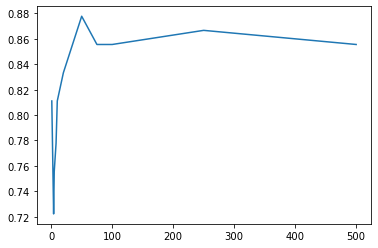

In [12]:
plt.plot(n_estimators_array, results)

#### 50 is optimal

#### Creating lists With Hyperparameter Values to Test: one list for three features: max_features, max_depth, and min_samples_leaf. Then creating a dictionary with the hyperparameter names as keys and list variables as values referred to as a grid. ######Code learned from DSO106 L3P7.


In [13]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)
####Copied code in DSO106 L3P7

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


#### Running the Random Forest

In [14]:
rf = RandomForestClassifier(n_estimators=50)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

#### Best Parameters to Use

In [15]:
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 70}

In [16]:
forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=4, max_features="auto", max_depth=50)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=4, n_estimators=50)

In [17]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[59  3]
 [10 18]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        62
           1       0.86      0.64      0.73        28

    accuracy                           0.86        90
   macro avg       0.86      0.80      0.82        90
weighted avg       0.86      0.86      0.85        90



#### Now we see that the model increased further in accuracy to overall 86%. The model is now 85% accurate in not predicting death, and 89% accurate in predicting a death due to heart failure.

#### Feature Importance: Determining the most influential variables contributing to heart failure in this dataset

In [18]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

time                        0.358424
serum_creatinine            0.190098
ejection_fraction           0.146253
age                         0.098014
platelets                   0.060704
creatinine_phosphokinase    0.057854
serum_sodium                0.050935
anaemia                     0.012150
diabetes                    0.009989
sex                         0.007123
high_blood_pressure         0.006336
smoking                     0.002119
dtype: float64


#### Plotting Results

<AxesSubplot:>

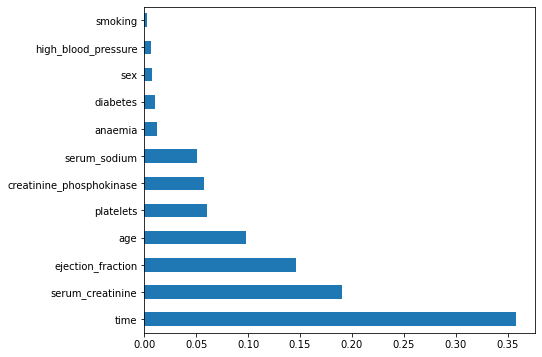

In [19]:
feature_importances.plot(kind='barh', figsize=(7,6))

#### The results are very interesting as time, which is the follow up period in days, is the most influential variable. The next highly influential variables were serum creatinine, ejection fraction, age, platelets, creatinine phosphokinase, and serum sodium.  The least influential variables according to this data were gender, anaemia, diabetes, high blood pressure, and smoking. 
## I ran the above analysis just to get a preliminary look at the data, Below I will be removing the 'time' variable in order to focus solely on which biometric features have the greatest influcence in predicting heart failure.

In [20]:
HeartFail.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Creating a dataframe without the 'time' variable:

In [12]:
HrtFail = HeartFail[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT']]

In [13]:
HrtFail.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [23]:
#### Now HrtFail will be the dataframe we use as the variable of 'time' has been removed

#### Correlation Matrix

In [19]:
HrtFail.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.0,0.088,-0.082,-0.1,0.06,0.093,-0.052,0.16,-0.046,0.065,0.019,0.25
anaemia,0.088,1.0,-0.19,-0.013,0.032,0.038,-0.044,0.052,0.042,-0.095,-0.11,0.066
creatinine_phosphokinase,-0.082,-0.19,1.0,-0.0096,-0.044,-0.071,0.024,-0.016,0.06,0.08,0.0024,0.063
diabetes,-0.1,-0.013,-0.0096,1.0,-0.0049,-0.013,0.092,-0.047,-0.09,-0.16,-0.15,-0.0019
ejection_fraction,0.06,0.032,-0.044,-0.0049,1.0,0.024,0.072,-0.011,0.18,-0.15,-0.067,-0.27
high_blood_pressure,0.093,0.038,-0.071,-0.013,0.024,1.0,0.05,-0.0049,0.037,-0.1,-0.056,0.079
platelets,-0.052,-0.044,0.024,0.092,0.072,0.05,1.0,-0.041,0.062,-0.13,0.028,-0.049
serum_creatinine,0.16,0.052,-0.016,-0.047,-0.011,-0.0049,-0.041,1.0,-0.19,0.007,-0.027,0.29
serum_sodium,-0.046,0.042,0.06,-0.09,0.18,0.037,0.062,-0.19,1.0,-0.028,0.0048,-0.2
sex,0.065,-0.095,0.08,-0.16,-0.15,-0.1,-0.13,0.007,-0.028,1.0,0.45,-0.0043


#### Decision Tree

In [24]:
x = HrtFail.drop('DEATH_EVENT', axis=1)
y = HrtFail['DEATH_EVENT']

#### Train Test Split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

#### Creating Preliminary Decision Tree

In [26]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

#### Model Assessment

In [27]:
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))
print(classification_report(y_test, treePredictions))

[[49 13]
 [10 18]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        62
           1       0.58      0.64      0.61        28

    accuracy                           0.74        90
   macro avg       0.71      0.72      0.71        90
weighted avg       0.75      0.74      0.75        90



#### This model shows overall accuracy rate of 75%. It is 83% accurate in predicting not having a death, while 58% accurate in predicting a death due to heart failure.

#### Random Forest
##### Data Wrangling

In [28]:
x = HrtFail.drop('DEATH_EVENT', axis=1)
y = HrtFail['DEATH_EVENT']

#### Test Train Split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

#### Preliminary Random Forest Model

In [30]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

#### Evaluating Model Fit

In [31]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[56  6]
 [14 14]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        62
           1       0.70      0.50      0.58        28

    accuracy                           0.78        90
   macro avg       0.75      0.70      0.72        90
weighted avg       0.77      0.78      0.77        90



#### Random Forest model shows overall 77% accuracy. 80% accuracy in predicting survival and 70% accurate in predicting death due to heart failure.

#### Hyperparameter and Number of Estimators

In [32]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.6777777777777778
4 : 0.7111111111111111
5 : 0.7111111111111111
8 : 0.7444444444444445
10 : 0.7555555555555555
20 : 0.7444444444444445
50 : 0.7222222222222222
75 : 0.7444444444444445
100 : 0.7555555555555555
250 : 0.7666666666666667
500 : 0.7777777777777778


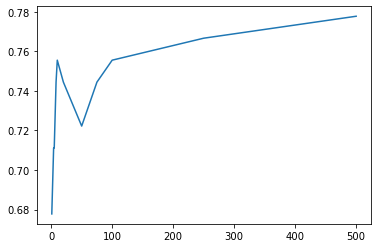

In [33]:
plt.plot(n_estimators_array, results)

#### 500 is optimal

#### Creating lists With Hyperparameter Values to Test: one list for three features: max_features, max_depth, and min_samples_leaf. Then creating a dictionary with the hyperparameter names as keys and list variables as values referred to as a grid. ######Code learned from DSO106 L3P7.

In [34]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)
#Code learned from DSO106 L3P7

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [35]:
rf = RandomForestClassifier(n_estimators=500)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [36]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

#### Best Parameters

In [37]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}

In [38]:
forest = RandomForestClassifier(n_estimators=500, min_samples_leaf=4, max_features="auto", max_depth=80)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, n_estimators=500)

##### Running the Model

In [39]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[56  6]
 [18 10]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        62
           1       0.62      0.36      0.45        28

    accuracy                           0.73        90
   macro avg       0.69      0.63      0.64        90
weighted avg       0.72      0.73      0.71        90



#### This model is overall 72% accurate. It is 76% accurate in predicting survival, while 62% accurate in predicting a death due to heart failure

#### Feature Importance

In [40]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
feature_importances

serum_creatinine            0.275842
ejection_fraction           0.218639
age                         0.157234
platelets                   0.100283
serum_sodium                0.093545
creatinine_phosphokinase    0.084355
diabetes                    0.015213
sex                         0.015163
anaemia                     0.015004
smoking                     0.012483
high_blood_pressure         0.012240
dtype: float64

<AxesSubplot:>

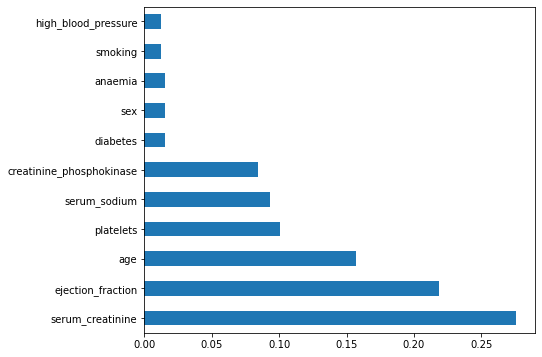

In [41]:
feature_importances.plot(kind='barh', figsize=(7,6))


#### Here the data shows that by just looking at biometric factors influencing heart failure, we see that the most influencial variable was serum creatinine followed by ejection fraction, age, platelets, serum sodium, and creatinine phosphokinase. The factors that were less influential were gender, anaemia, diabetes, smoking, and high blood pressure. That does not mean those factors are not important, just that in this particular study of 299 citizens of Pakistan, the data shows that serum creatinine and ejection fraction were the most strongly linked to contributing to heart failure. 

####### I am not a medical doctor. These thoughts are my own based on drawing inferences from the datasets. If you are concerned and have questions about your health in regards to these studies, please speak to a licensed medical professional-MP

#### Separating the most influential variables based on the feature importance for correlation matrix

In [6]:
HeartFail11 = HeartFail[['creatinine_phosphokinase', 'serum_sodium', 'platelets', 'age', 'ejection_fraction', 'serum_creatinine']]

In [5]:
HeartFail11.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,creatinine_phosphokinase,serum_sodium,platelets,age,ejection_fraction,serum_creatinine
creatinine_phosphokinase,1.0,0.06,0.024,-0.082,-0.044,-0.016
serum_sodium,0.06,1.0,0.062,-0.046,0.18,-0.19
platelets,0.024,0.062,1.0,-0.052,0.072,-0.041
age,-0.082,-0.046,-0.052,1.0,0.06,0.16
ejection_fraction,-0.044,0.18,0.072,0.06,1.0,-0.011
serum_creatinine,-0.016,-0.19,-0.041,0.16,-0.011,1.0


#### Scatterplot of Serum Creatinine and Serum Sodium

Text(0, 0.5, 'Serum Sodium')

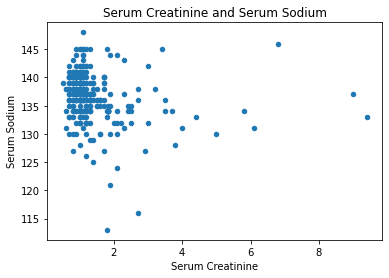

In [6]:
Plot = HeartFail11.plot.scatter(x='serum_creatinine', y='serum_sodium')
Plot.set_title("Serum Creatinine and Serum Sodium")
Plot.set_xlabel("Serum Creatinine")
Plot.set_ylabel("Serum Sodium")

#### Scatterplot of Ejection Fraction and Serum Sodium

Text(0, 0.5, 'Serum Sodium')

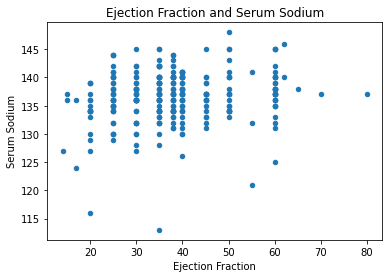

In [7]:
Plot = HeartFail11.plot.scatter(x='ejection_fraction', y='serum_sodium')
Plot.set_title("Ejection Fraction and Serum Sodium")
Plot.set_xlabel("Ejection Fraction")
Plot.set_ylabel("Serum Sodium")

#### Scatterplot of Serum Creatinine and Ejection Fraction

Text(0, 0.5, 'Ejection Fraction')

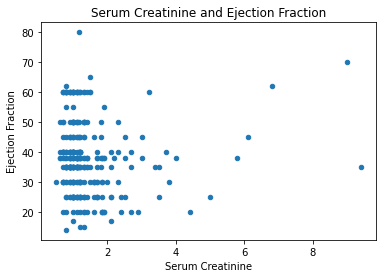

In [7]:
Plot = HeartFail11.plot.scatter(x='serum_creatinine', y='ejection_fraction')
Plot.set_title("Serum Creatinine and Ejection Fraction")
Plot.set_xlabel("Serum Creatinine")
Plot.set_ylabel("Ejection Fraction")

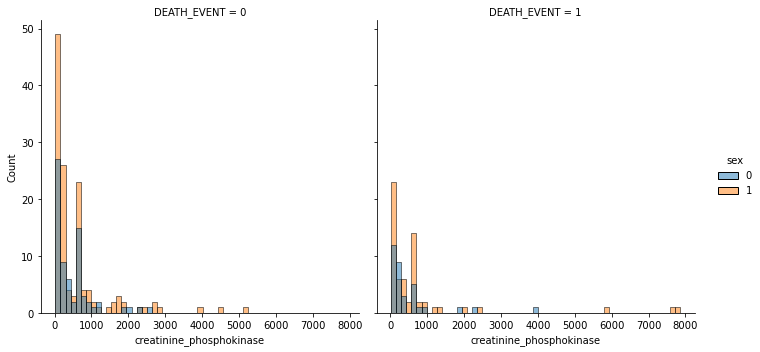

In [14]:

sns.displot(HrtFail, x='creatinine_phosphokinase', hue = 'sex', col = 'DEATH_EVENT', kind='hist')


In [10]:
### Above is the death events with gender and creatinine phosphokinase

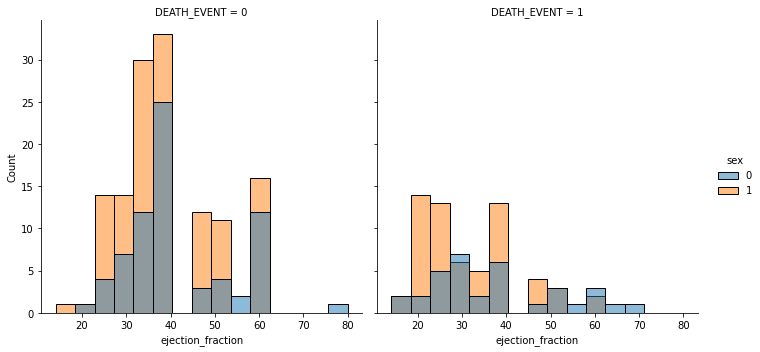

In [61]:
sns.displot(HrtFail, x='ejection_fraction', hue = 'sex', col = 'DEATH_EVENT', kind='hist')

In [62]:
#### This is the death events by gender for ejection fraction which was one of the top influential variables for heart failure
#### Here we can see that most of the deaths did have 40% or less EF but there were still some with normal EF levels so that confirms that other variables are at play here

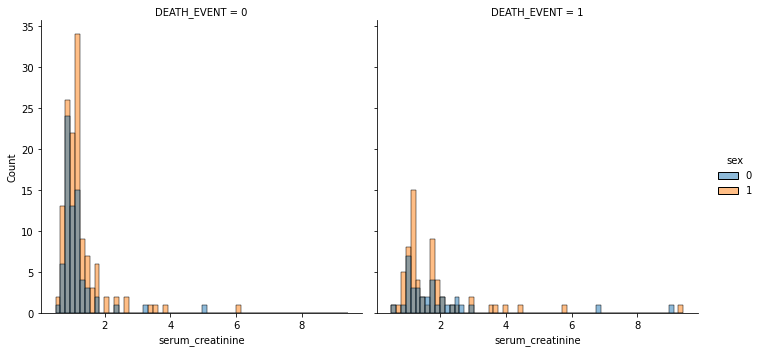

In [63]:
sns.displot(HrtFail, x='serum_creatinine', hue = 'sex', col = 'DEATH_EVENT', kind='hist')

#### Plot of platelets and gender looking at Death Event

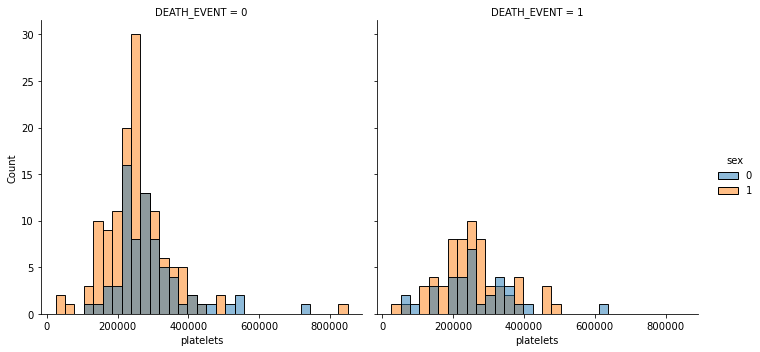

In [66]:
sns.displot(HrtFail, x='platelets', hue = 'sex', col = 'DEATH_EVENT', kind='hist')

In [68]:
#### Looks like most people that died had normal platelet range, only a few had critical levels above 450k and less than 150k. 

#### Joint Plot of Serum Creatinine and Serum Sodium

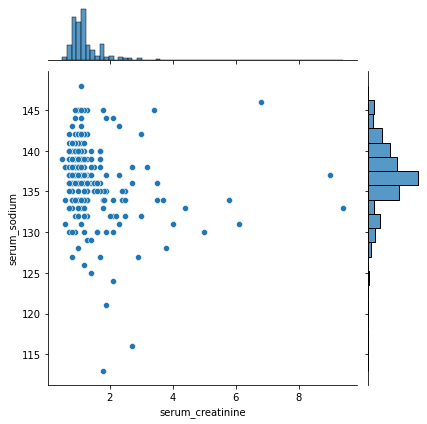

In [9]:
sns.jointplot(data= HeartFail, x="serum_creatinine", y="serum_sodium")

In [8]:
#pwd

In [15]:
#### I hope you enjoyed this exploration/analysis of the heart failure dataset from UCI! ~Maria (Mia) Panos